### GPN's Brain Aging Prediction Data - Step01_structural_processing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch, plot_batch

#### Setup Data

In [8]:
# Takes a while because it scans CEREBRO Study directory for the data.
# Pre-storing the data into train and test folders will speed up the process.
data = rio.data.BrainAgingPredictionDataModule(
    root='~/LocalCerebro',
    data_dir='processed_data',
    step='step01_structural_processing',
    use_augmentation=False,
    use_preprocessing=False,
    batch_size=32,
    intensities=["T1", "FLAIR"],
    labels=[],
)
data.prepare_data()
print(data.has_train_test_split)
print(data.has_train_val_split)

True
True


In [5]:
data.setup()

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.


ValueError: Subjects list is empty

In [ ]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

#### Get a Train and a Test Batch

In [ ]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [ ]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [9]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Sample shape: {train_batch['T1']['data'].shape}")
print(f"Image keys: {train_batch['T1'].keys()}")
print(f"Subject IDs: {train_batch['subj_id']}")
print(f"Scan IDs: {train_batch['scan_id']}")

Batch keys: dict_keys(['subj_id', 'scan_id', 'T1', 'FLAIR'])
Sample shape: torch.Size([32, 1, 160, 192, 160])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['ABD_IH_0071', 'ABD_SS_0006', 'ABD_AJ_0013', 'ABD_SW_0063', 'ABD_SW_0042', 'ABD_SW_0135', 'ABD_CN_0008', 'ABD_SS_0080', 'ABD_GJ_0092', 'ABD_AJ_0044', 'ABD_SS_0048', 'ABD_SS_0072', 'ABD_AJ_0187', 'ABD_SW_0053', 'ABD_AJ_0164', 'ABD_SS_0065', 'ABD_AJ_0048', 'ABD_AJ_0195', 'ABD_SS_0068', 'ABD_AJ_0079', 'ABD_AJ_0144', 'ABD_SS_0087', 'ABD_IH_0014', 'ABD_SS_0090', 'ABD_SW_0068', 'ABD_AJ_0125', 'ABD_AJ_0049', 'ABD_SW_0009', 'ABD_IH_0117', 'ABD_BS_0019', 'ABD_AJ_0057', 'ABD_AJ_0157']
Scan IDs: ['scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 

#### Plot Example Train and Test Data

Subject: 0


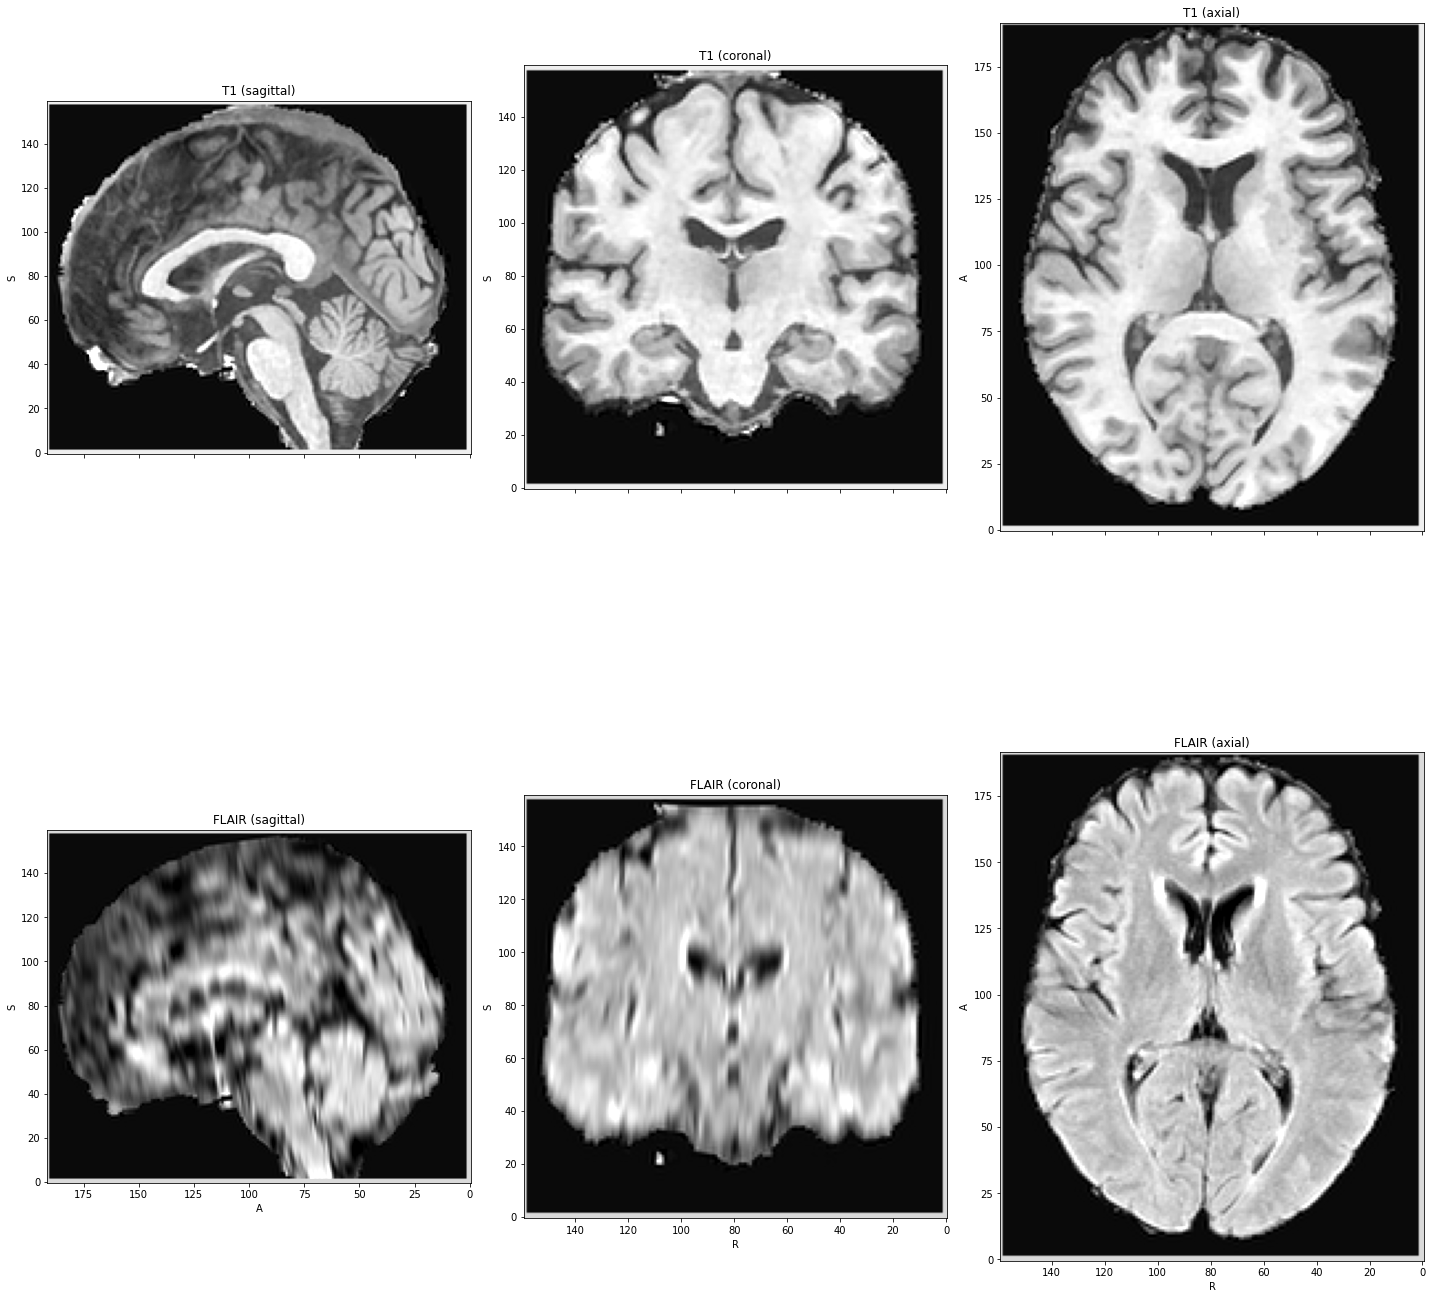



Subject: 1


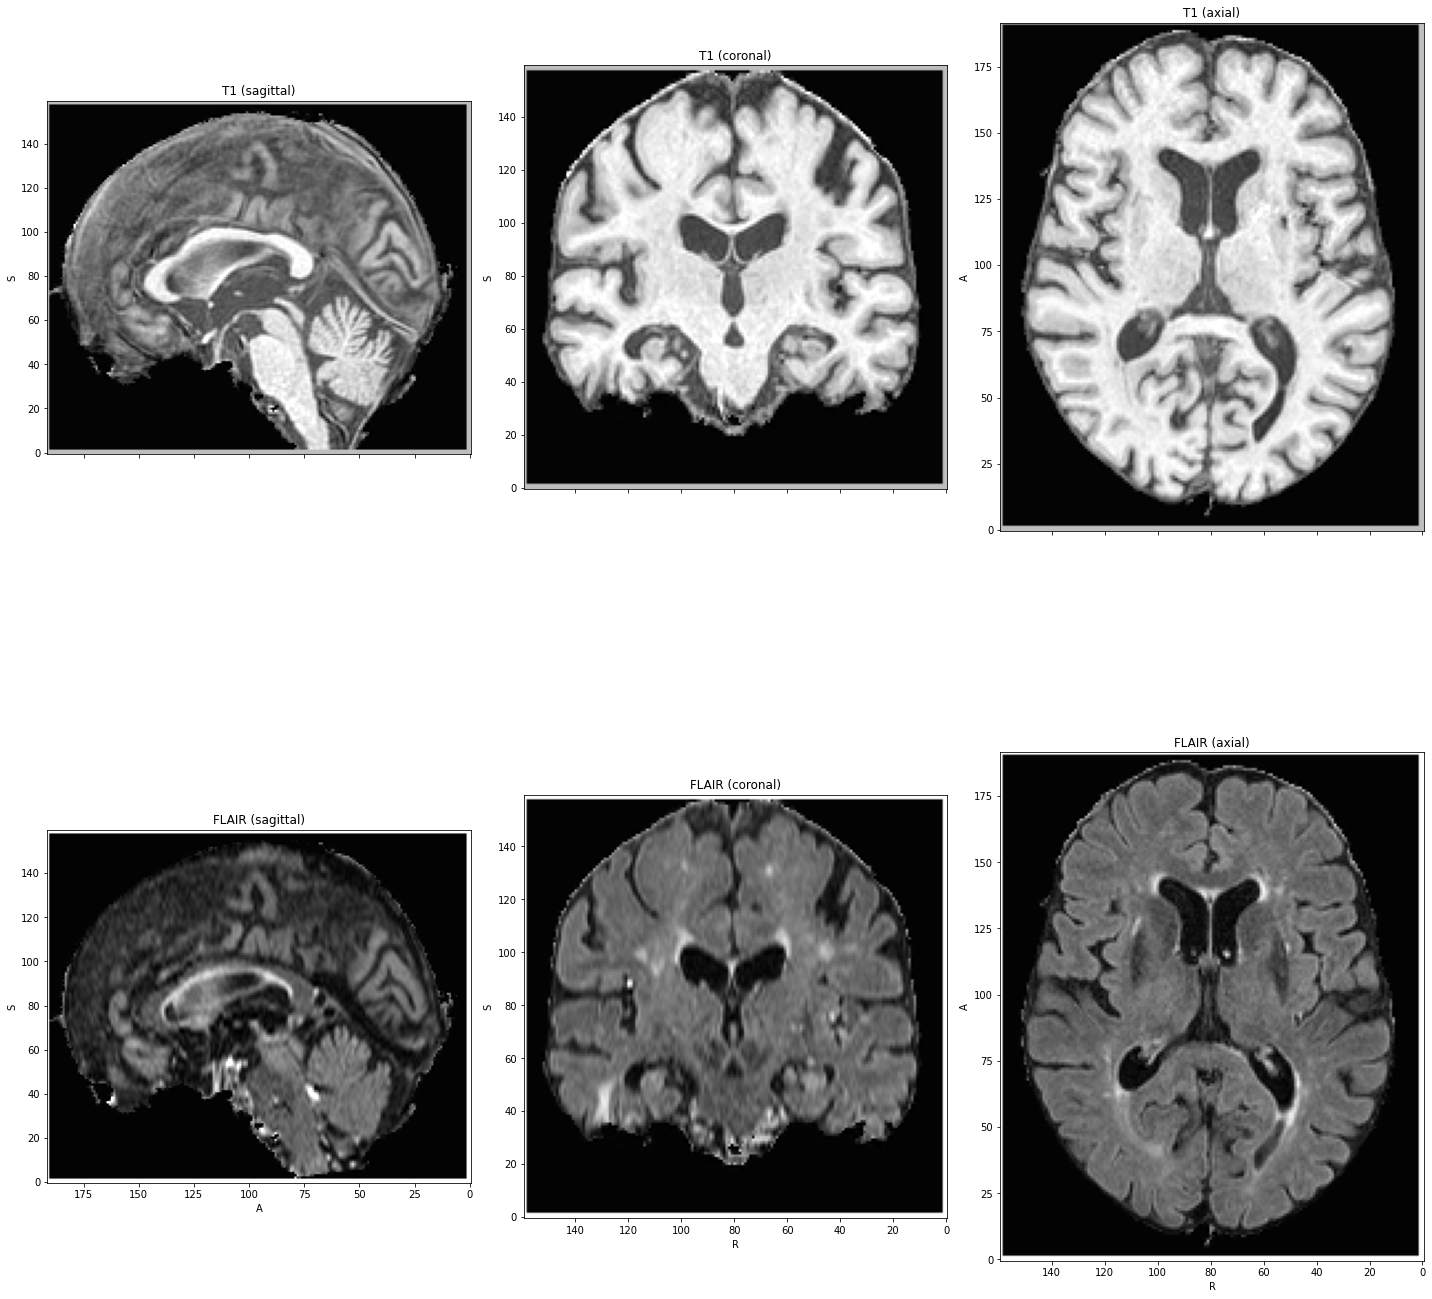



Subject: 2


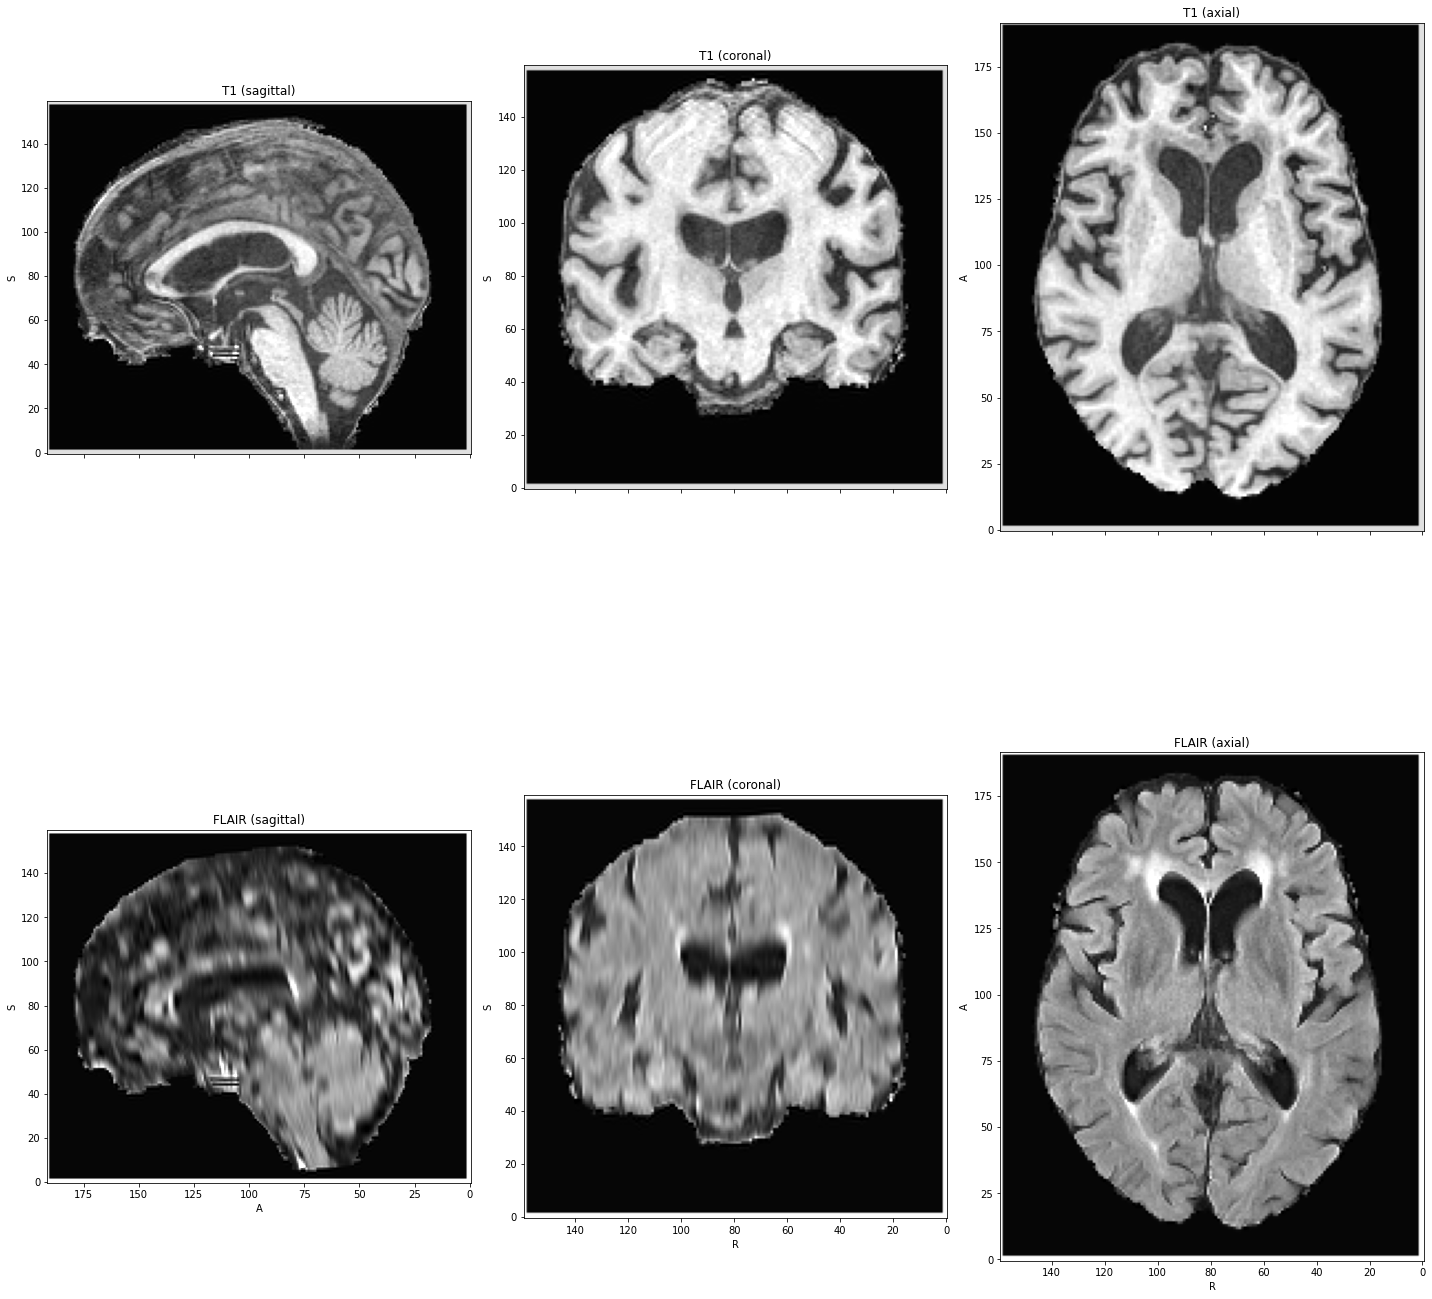



Subject: 3


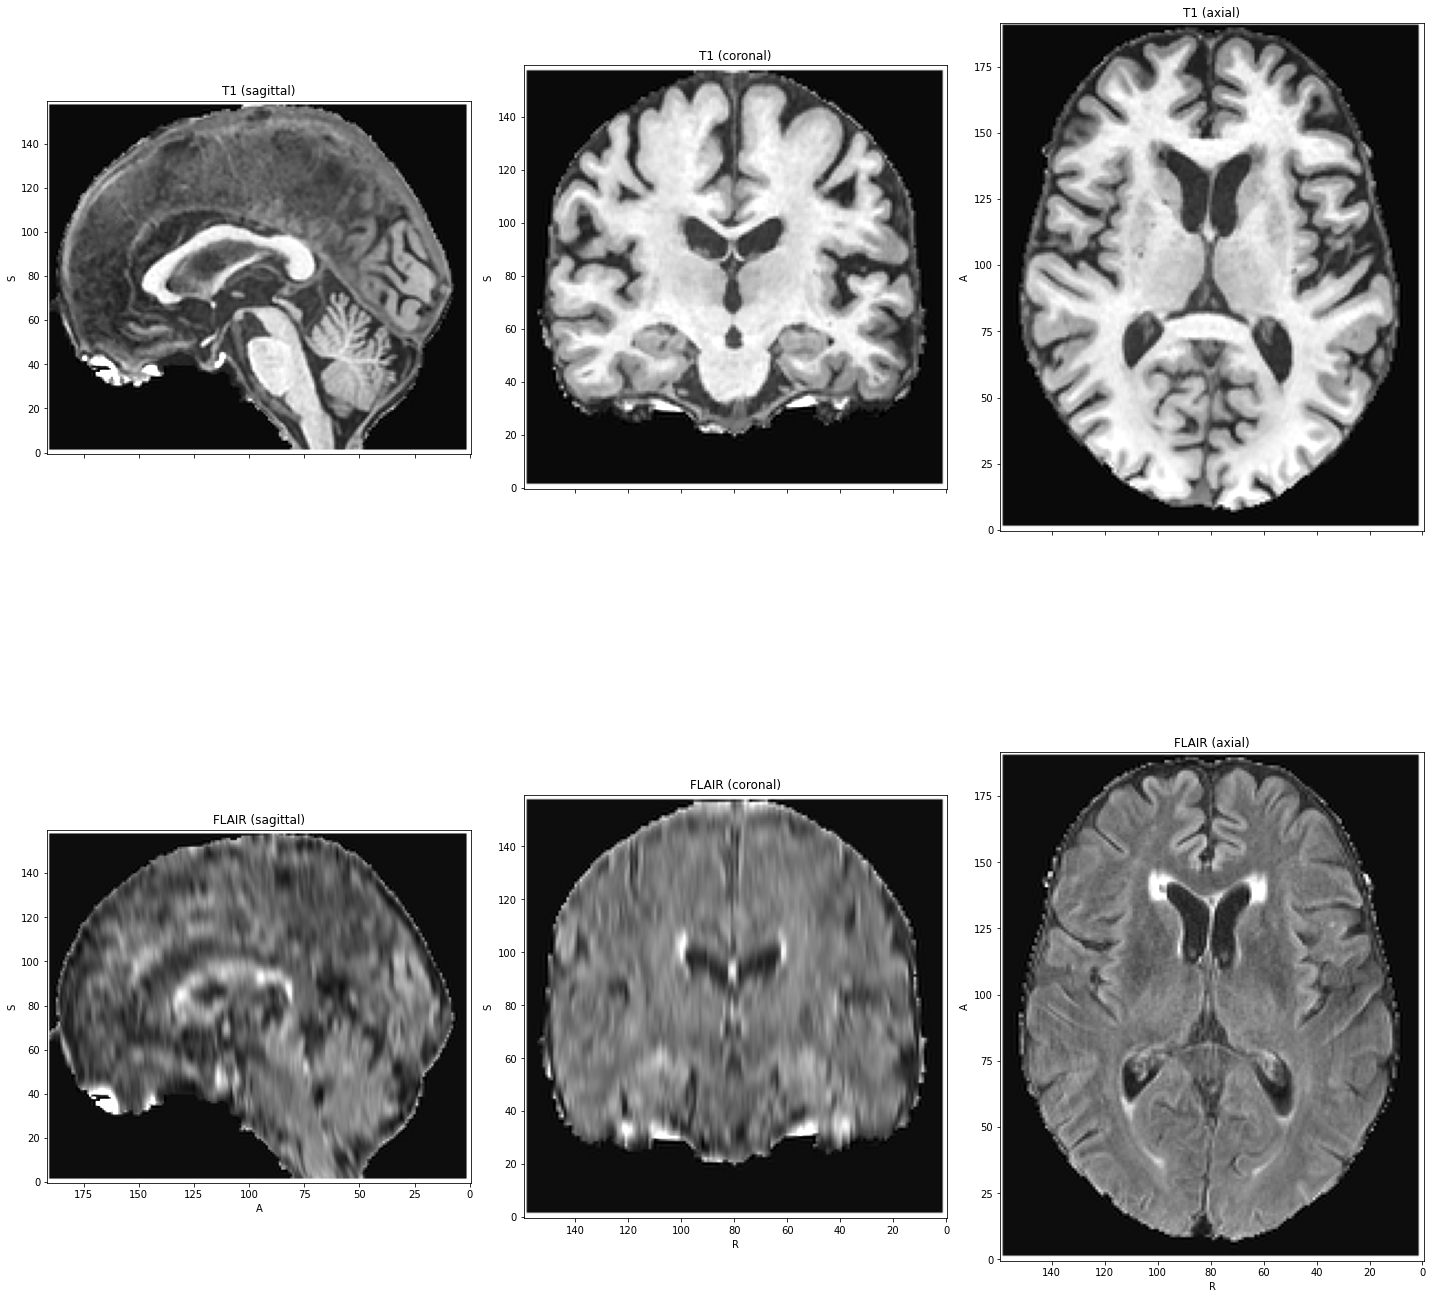

In [10]:
plot_batch(train_batch)

Subject: 0


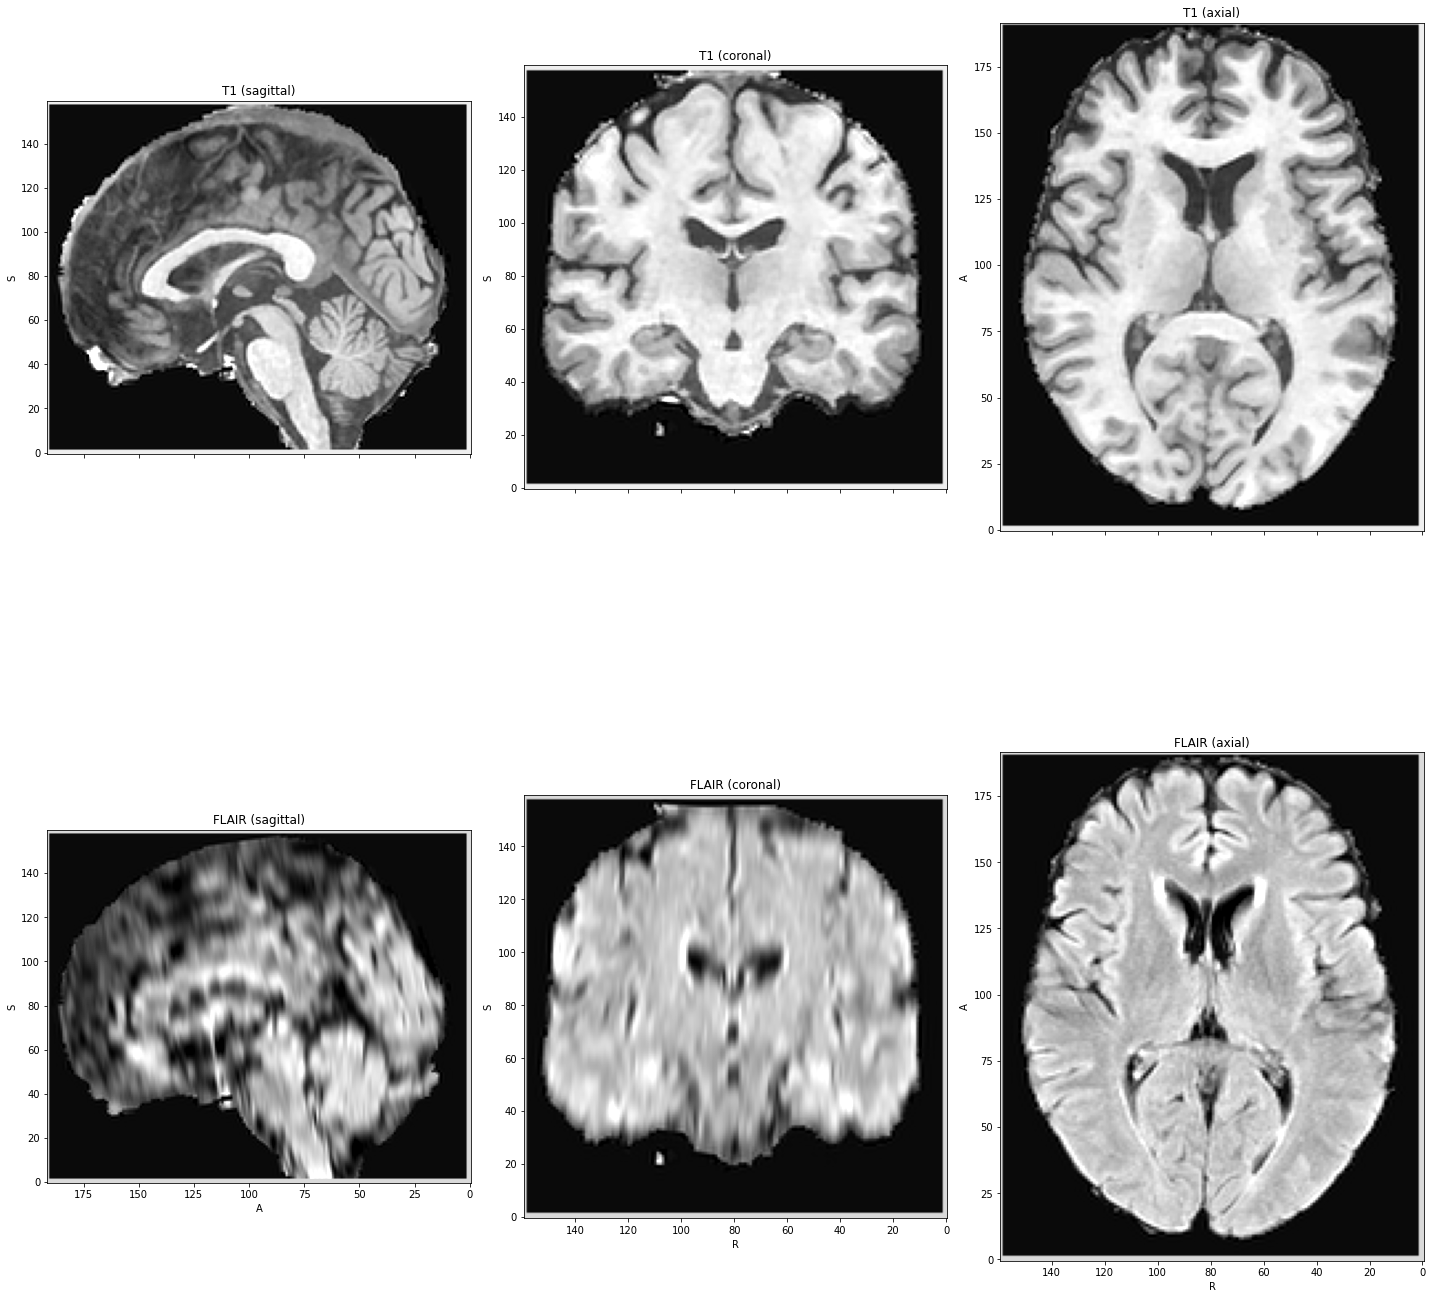



Subject: 1


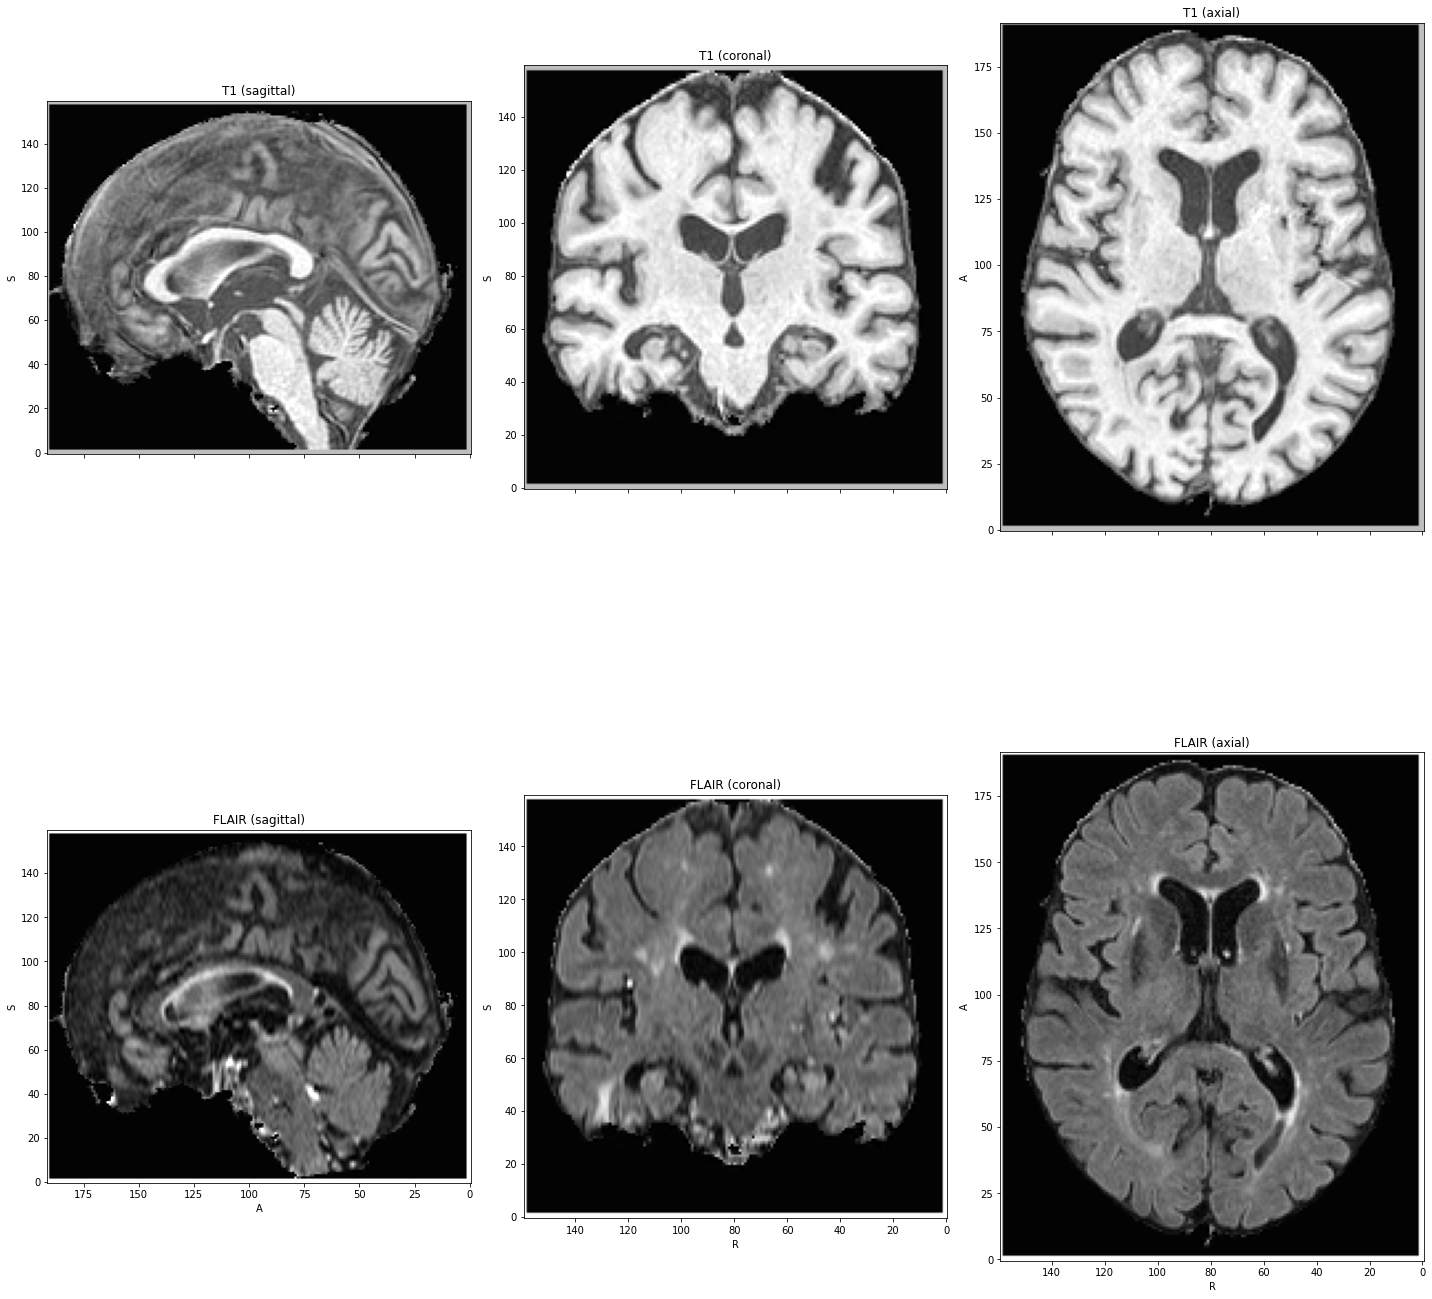



Subject: 2


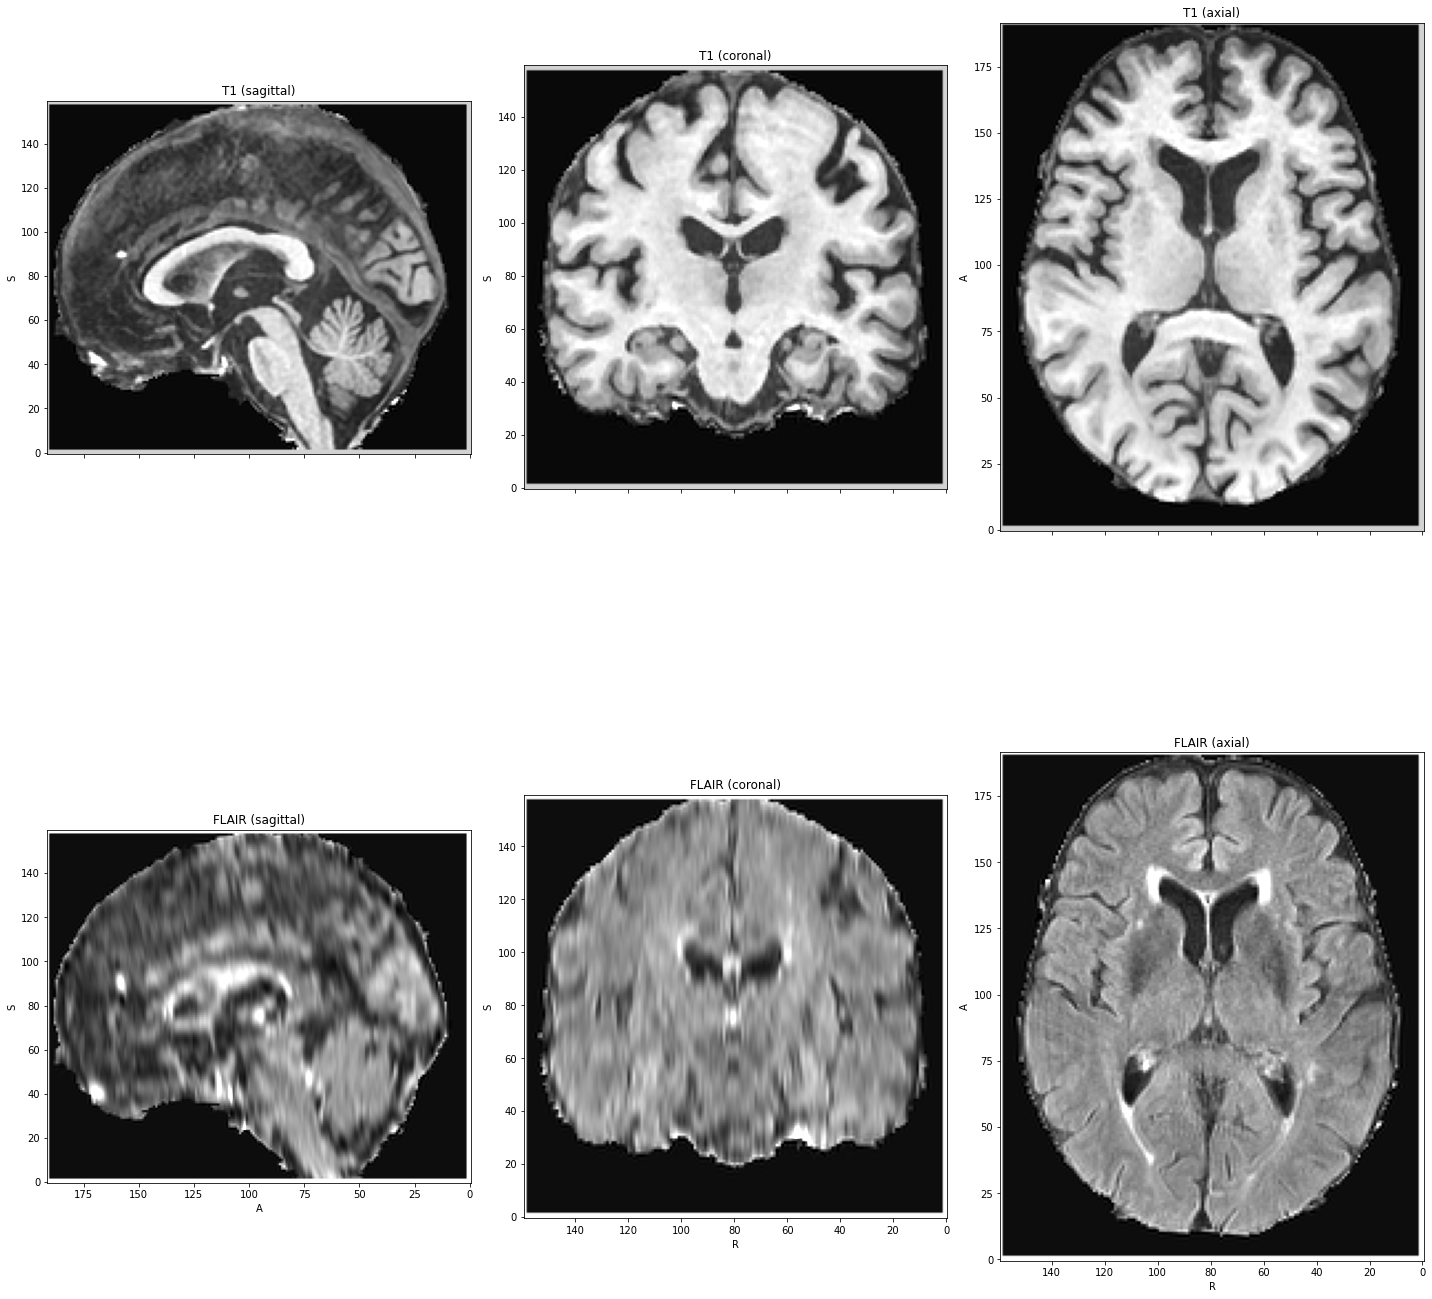



Subject: 3


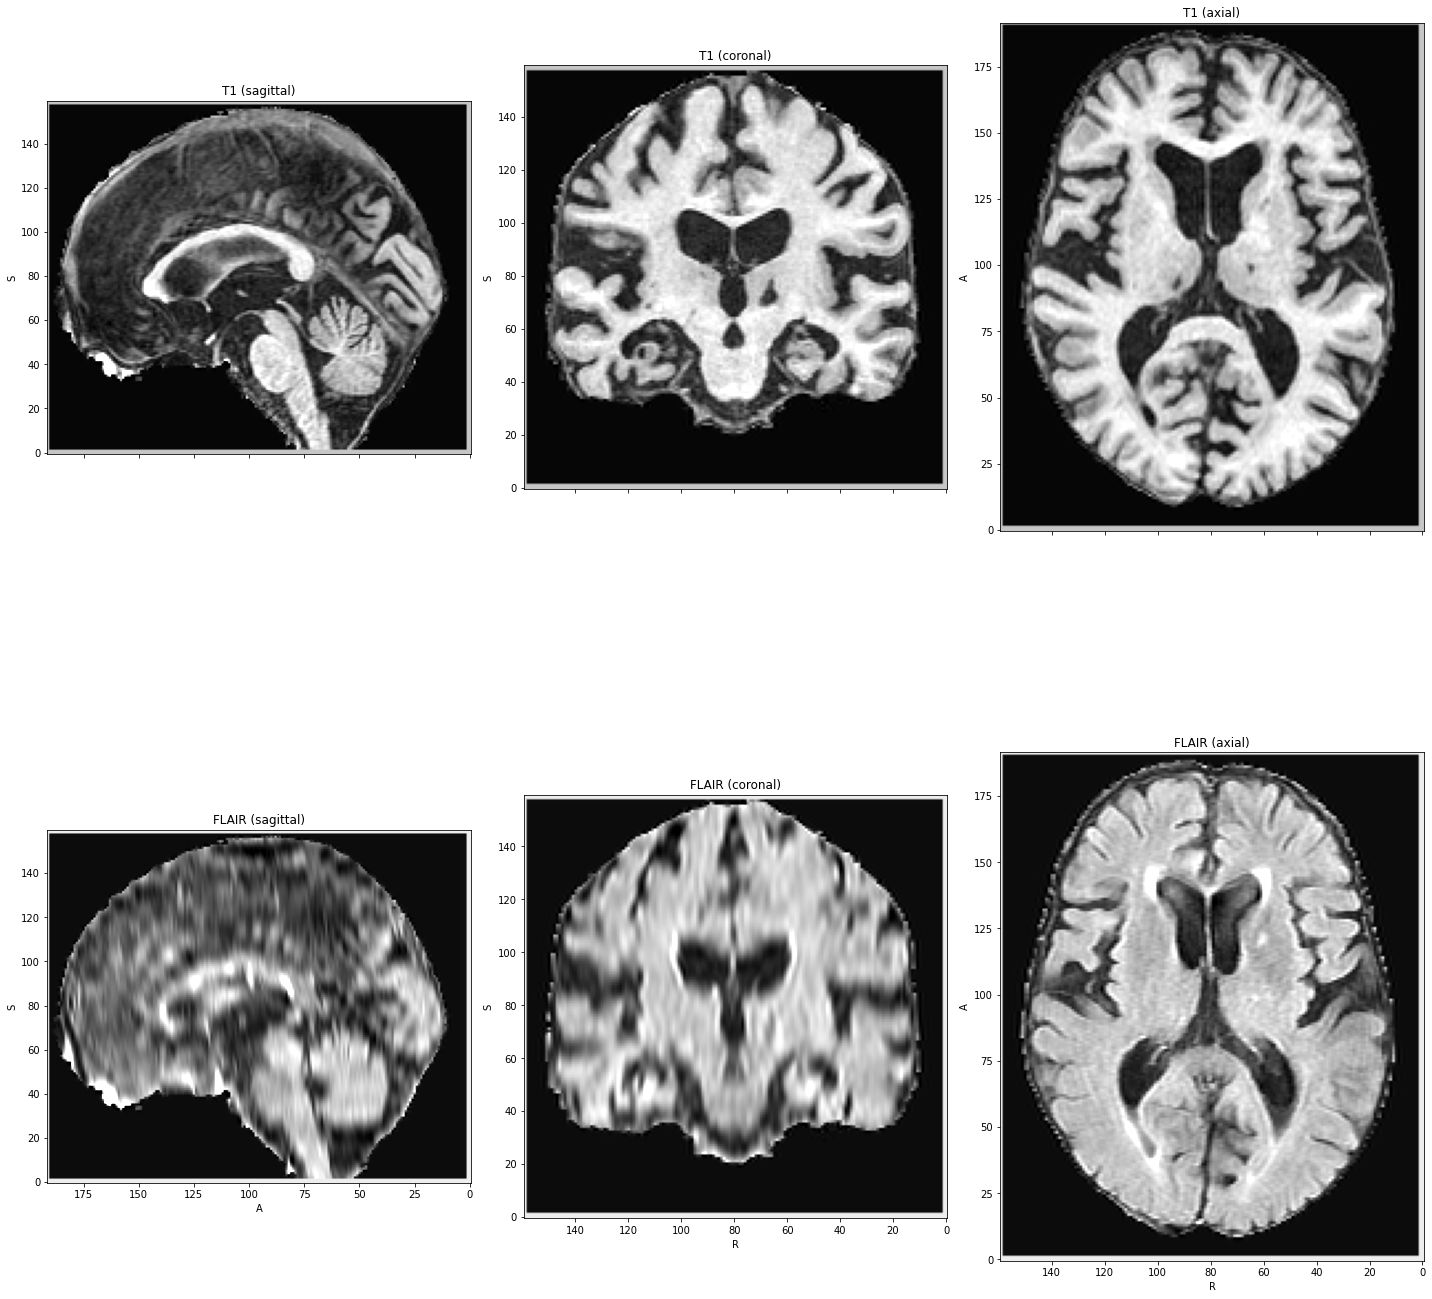

In [11]:
plot_batch(test_batch)